# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [7]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
# Importam librariile necesare 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Cele pentru neural networks 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\vitok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
# data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# columns = [
#     "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
#     "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
#     "hours-per-week", "native-country", "income"
# ]

# data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
# data.sample(10)

In [2]:
# Importam datele preprocesate din tema 1
data = pd.read_csv('clean_data_T1.csv')

In [3]:
# Separare target de features
if 'hours-per-week' in data.columns:
    X = data.drop(columns=['hours-per-week'])
    y = data['hours-per-week']
    
print(X.shape)

(32370, 43)


In [4]:
# Data split and scaling
# Pe langa datele de train si test, retelele neurale au nevoie si de un set de validare
# Split initial
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split secundar, train + validare
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [5]:
print(f"Train shapes: {X_train.shape}")
print(f"Validation shapes: {X_val.shape}")
print(f"Test shapes: {X_test.shape}")

Train shapes: (20716, 43)
Validation shapes: (5180, 43)
Test shapes: (6474, 43)


In [6]:
# Standardizare
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Alegerea loss function
#### Alegem huber loss
##### In tema 2, am observat outlieri semnificativi (de ex persoanele care lucreaza 99 de ore/saptamana)
##### MSE -> penalizeaza foarte tare erorile mari, iar modelul ar fi tras prea tare de outlieri
##### MAE -> este robusta, dar are probleme de derivare la 0
##### Hubber Loss -> combina cele doua: are o convergenta fina pentru erori mici si liniara pentru erori mari (robusta la outlieri)

In [7]:
# Baseline model
def build_baseline_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Un singur neuron pentru regresie (fără activare sau linear)
    ])
    model.compile(loss='huber',
                  optimizer = 'adam',
                  metrics=['mae', 'mse'])
    return model

In [8]:
# Construire si antrenare
baseline_model = build_baseline_model(X_train_scaled.shape[1])
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Antrenam modelul
history_baseline = baseline_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    verbose=1
)

Epoch 1/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8950 - mae: 6.3452 - mse: 103.3235 - val_loss: 6.9507 - val_mae: 7.4054 - val_mse: 133.8202
Epoch 2/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8876 - mae: 6.3368 - mse: 103.3793 - val_loss: 6.9993 - val_mae: 7.4619 - val_mse: 133.2878
Epoch 3/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8790 - mae: 6.3270 - mse: 102.9153 - val_loss: 6.9237 - val_mae: 7.3785 - val_mse: 132.9283
Epoch 4/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8771 - mae: 6.3256 - mse: 102.9090 - val_loss: 6.9845 - val_mae: 7.4496 - val_mse: 133.8074
Epoch 5/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8724 - mae: 6.3227 - mse: 102.6574 - val_loss: 6.9008 - val_mae: 7.3586 - val_mse: 131.9285
Epoch 6/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8762 - mae: 6.3250 - mse: 103.1290 - val_loss: 6.9195 - val_mae: 7.3774 - val_mse: 132.4600
Epoch 7/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8663 - 

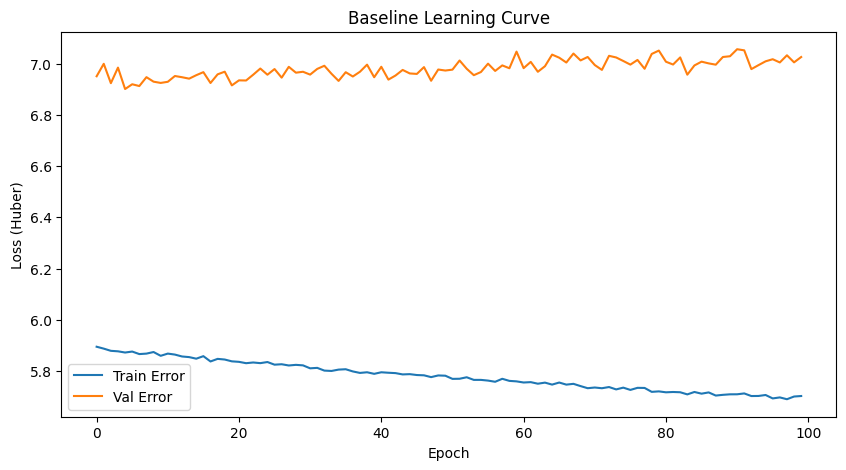

In [15]:
# Vizualizarea antrenarii
def plot_history(history, title="Model Training History"):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10, 5))
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Huber)')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_baseline, title="Baseline Learning Curve")

#### In acest grafic, observam ca eroarea de antrenament scade constant pe parcursul celor 100 de epoci, ceea ce arata ca modelul invata tiparele din datele pe care le vede repetat. Totusi, eroarea de validare, nu merge pe aceeasi tendinta, ci prezinta o usoara crestere. Distantarea intre cele doua curbe este un caz clasic de overfitting. In mod ideal, cele doua curbe ar trebui sa scada in paralel si sa se apropie unul de altul.
#### Ambele linii raman stabile (5.7 si 7.1), fara explozii, din cauza huber loss-ului, care gestioneaza eficient valorile extreme.


In [16]:
# Voi incerca sa imbunatatesc modelul prin adaugarea:
# dropout: pentru a preveni overfitting
# model cu mai multe layere si neuroni
# L2 regularization -> penalizare pentru greutati mari

In [17]:
# Experimentare si optimizare
from tensorflow.keras import regularizers


def build_complex_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        # Layer 1: Mai lat + Regularizare L2
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3), # 30% dropout
        
        # Layer 2
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.2),
        
        # Layer 3
        layers.Dense(32, activation='relu'),
        
        # Output
        layers.Dense(1)
    ])
    # Folosim un Learning Rate mai mic pentru stabilitate
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(loss='huber',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

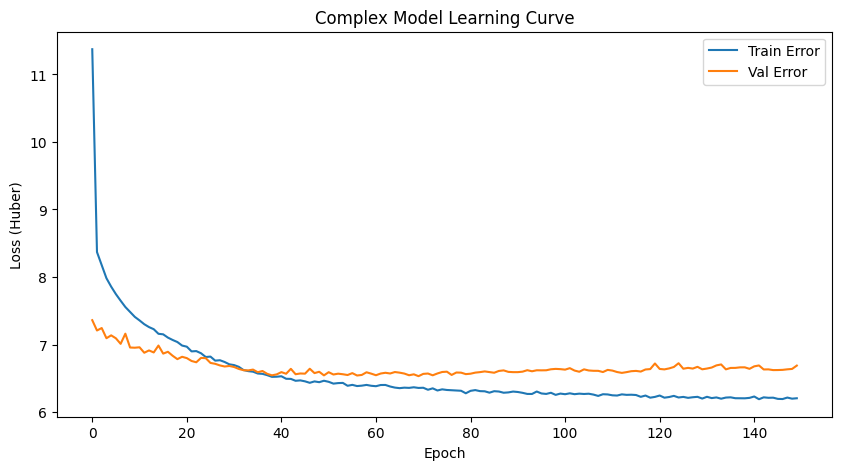

In [19]:
# Antrenare model complex
complex_model = build_complex_model(X_train_scaled.shape[1])

history_complex = complex_model.fit(
    X_train_scaled, y_train,
    epochs=150, # Mai multe epoci, deoarece avem dropout
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    verbose=0
)


plot_history(history_complex, title="Complex Model Learning Curve")

#### Acest model este mult mai bine antrenat si arata o evolutie mult mai buna. Distanta dintre cele doua curbe este mult mai mica, si consntanta, mergand pana la sfarsit (150 epoci). Aceasta este o dovada clara ca tehnicile de regularizare introduse (dropout si L2) isi fac treaba, impiedicand modelul sa memoreze outlierii din setul de date.

### Hyperparameter tuning

In [20]:
# In loc sa ghicim numarul de neuroni, putem folosi o bucla simpla pentru a cauta cea mai buna configuratie. 
# Realizam un random search manual simplificat pentru a gasi numarul optimi de neuroni pe primul strat

In [21]:
import random

In [22]:
best_val_loss = float('inf')
best_weights = None
best_params = {}

# Definim un spatiu de cautare mic
param_grid = {
    'units_1': [64, 128, 256],
    'dropout': [0.2, 0.4],
    'learning_rate': [0.01, 0.001]
}



for i in range(3): # Testam 3 combinatii aleatoriu
    u1 = random.choice(param_grid['units_1'])
    drop = random.choice(param_grid['dropout'])
    lr = random.choice(param_grid['learning_rate'])
    
    print(f"Iteratia {i+1}: Units={u1}, Dropout={drop}, LR={lr}")
    
    # Construim modelul on-the-fly
    model = keras.Sequential([
        layers.Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(u1, activation='relu'),
        layers.Dropout(drop),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='huber', optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['mae'])
    
    # Antrenam scurt (20 epoci) doar pentru verificare
    hist = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, 
                     validation_data=(X_val_scaled, y_val), verbose=1)
    
    val_loss = hist.history['val_loss'][-1]
    print(f" -> Val Loss: {val_loss:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = model.get_weights()
        best_params = {'units': u1, 'dropout': drop, 'lr': lr}

    best_model = keras.models.clone_model(model)
    best_model.compile(loss='huber', optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['mae'])

    if best_weights is not None:
        best_model.set_weights(best_weights)
        print(f"\nCei mai buni hiperparametri gasiti: {best_params}")


Iteratia 1: Units=256, Dropout=0.4, LR=0.001
Epoch 1/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.1021 - mae: 14.5896 - val_loss: 7.2064 - val_mae: 7.6791
Epoch 2/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6954 - mae: 8.1774 - val_loss: 7.0275 - val_mae: 7.4996
Epoch 3/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5331 - mae: 8.0141 - val_loss: 7.0093 - val_mae: 7.4805
Epoch 4/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4739 - mae: 7.9550 - val_loss: 7.0057 - val_mae: 7.4798
Epoch 5/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4117 - mae: 7.8929 - val_loss: 6.9445 - val_mae: 7.4201
Epoch 6/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3882 - mae: 7.8693 - val_loss: 6.9255 - val_mae: 7.3925
Epoch 7/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3195 - mae: 7.7999 - val_loss: 6.8450 - val_mae: 7.3098
Epoch 8/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3086 - mae: 7.7890 - val_loss: 6.9050 - val_mae: 7.3770
Epoch 9/2

#### Valorea de 128 units -> sugereaza ca setul de date are o complexitate medie spre mare. Acest numar ii ofera retelei destula capacitate de memorare, pentru a invata corelatiile dintre variabilele demografice si tinta de regresie.
#### dropout de 0.2 -> previne overfittingul, fiind o valoare echilibrata. 
#### lr de 0.001 -> este destul de mica pentru a asigura o convergenta stabila, dar destul de mare pentru ca antrenarea sa nu dureze mult.

# Evaluare finala

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Baseline NN Results ---
RMSE: 11.2499
MAE:  7.2974
R2:   0.1580
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Complex NN (Dropout+L2) Results ---
RMSE: 10.8990
MAE:  6.6795
R2:   0.2097


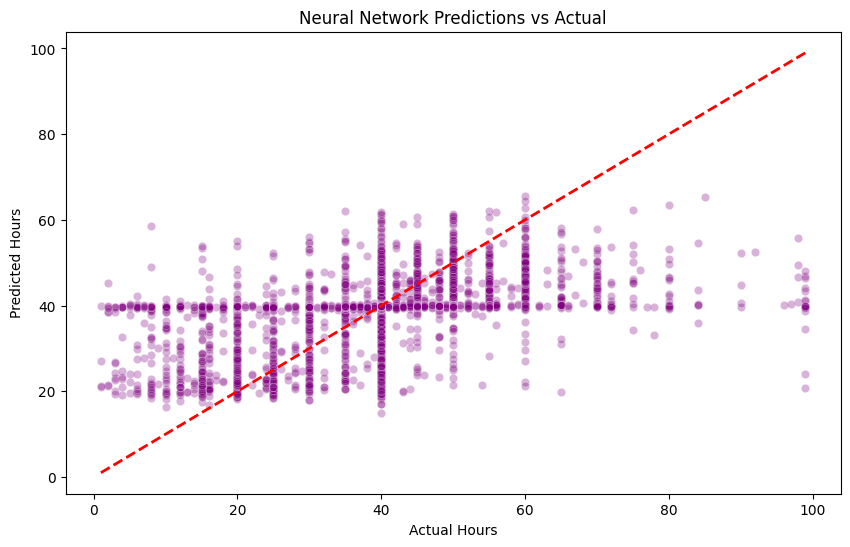

In [23]:
# Vom compara cel mai bun model cu baseline si cu modelele clasice din tema 3
# Evaluare pe setul de TEST

def evaluate_final(model, name):
    preds = model.predict(X_test_scaled).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    print(f"--- {name} Results ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R2:   {r2:.4f}")
    return preds

# Evaluam Baseline-ul
preds_base = evaluate_final(baseline_model, "Baseline NN")

# Evaluam Modelul Complex
preds_complex = evaluate_final(complex_model, "Complex NN (Dropout+L2)")

# Scatter Plot: Actual vs Predicted (Complex Model)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds_complex, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Hours')
plt.ylabel('Predicted Hours')
plt.title('Neural Network Predictions vs Actual')
plt.show()

In [24]:
# Definim functia care returneaza valorile
def get_metrics(model, X, y):
    preds = model.predict(X, verbose=0).flatten()
    rmse = np.sqrt(mean_squared_error(y, preds))
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)
    return rmse, mae, r2

# Calculam metricile pentru fiecare model

# Baseline Model
print("Evaluare Baseline...")
rmse_base, mae_base, r2_base = get_metrics(baseline_model, X_test_scaled, y_test)

# Complex Model
print("Evaluare Complex Model...")
rmse_complex, mae_complex, r2_complex = get_metrics(complex_model, X_test_scaled, y_test)

# Tuned Model (cel mai bun model gasit la Random Search)
# Verificam daca best_model exista (din pasul de tuning)
if 'best_model' in locals() and best_model is not None:
    print("Evaluare Tuned Model...")
    rmse_tuned, mae_tuned, r2_tuned = get_metrics(best_model, X_test_scaled, y_test)
else:
    rmse_tuned, mae_tuned, r2_tuned = 0, 0, 0
    print("Valorile vor fi 0.")

# Creare tabel final
results_df = pd.DataFrame({
    'Model': ['Baseline NN', 'Complex NN (Dropout+L2)', 'Tuned NN (Best Params)'],
    'RMSE': [rmse_base, rmse_complex, rmse_tuned],
    'MAE': [mae_base, mae_complex, mae_tuned],
    'R2 Score': [r2_base, r2_complex, r2_tuned]
})

# Afisare tabel
print("Rezultate finale")
print(results_df)

Evaluare Baseline...
Evaluare Complex Model...
Evaluare Tuned Model...
Rezultate finale
                     Model       RMSE       MAE  R2 Score
0              Baseline NN  11.249893  7.297369  0.157957
1  Complex NN (Dropout+L2)  10.898953  6.679526  0.209673
2   Tuned NN (Best Params)  11.001376  7.112460  0.194749


# Concluzii
### In urma experimentelor, am putut observa ca un model simplu tinde sa faca overfitting. Prin introducerea tehnicilor de regularizare (dropout si L2), am obtinut un model mult mai puternic care generalizeaza mai bine datele de test. Modelul complex este cel mai bun model, avand cel mai mic RMSE (10.89) si MAE (6.67). Desi modelul complex a redus overfittingul si a obtinut cel mai bun scor R2 de 0.20, performanta generala ramane limitata de natura datelor demografice, care nu pot explica in totalitate variatia orelor de munca.
### Comparativ cu modelele clasice de regresie, retelele neurale au necesitat mult mai mult efort de tuning pentru a atinge o performanta similara, sugerand ca pentru aceste tipuri de date, modelele bazate pe random forest ar putea fi o alternativa mult mai eficienta.